# Notebook 11 - Working with WMS Services in GemGIS

[GemGIS](https://github.com/cgre-aachen/gemgis) is a package for geographic information processing for geomodeling. In particular, data is prepared for direct use in [GemPy](https://github.com/cgre-aachen/gempy) via a GemPy Data Class. The package provides functions to process spatial data such as vector data (shape files, geojson files, geopackages), raster data (tiff-files), data retrieved from online services (WMS, WCS, WFS) or KML/XML files. 

At a later stage, functionality will be added to interactively add interfaces and orientations for a model, choosing the extent, defining custom sections and more. In addition, functionality will be provided to export data from GemPy into Geoinformation Systems (=GIS) such as QGIS or ArcGIS and Google Earth.  

# Overview

This notebook will present how data obtained from WFS services can be loaded into GemGIS with the [OWSLib](https://geopython.github.io/OWSLib/) package and how it can be manipulated for the usage in [GemPy](https://github.com/cgre-aachen/gempy).


- [What is a WFS Service?](#wfs)
- [What is OWSLib?](#owslib)
- [What is GemPy?](#gempy)
- [What are Interfaces and Orientations?](#intandor)
- [Downloading and Installing GemGIS](#gemgis)
- [Structure of GemGIS](#structure)
- [Importing Libraries](#import)
- [Version Reports](#vreport)

- [Example 1 - Loading a WMS Service](#ex1)
- [Example 2 - Downloading data from a WMS Service](#ex2)
- [Further Use](#ex3)


<a id='wms'></a>
## What is a WMS Service?

In computing, the Open Geospatial Consortium Web Feature Service (WFS) Interface Standard provides an interface allowing requests for geographical features across the web using platform-independent calls. One can think of geographical features as the "source code" behind a map, whereas the WMS interface or online tiled mapping portals like Google Maps return only an image, which end-users cannot edit or spatially analyze. The XML-based GML furnishes the default payload-encoding for transporting geographic features, but other formats like shapefiles can also serve for transport.

<img src="../data/Images/wfs.png" width=700>

Sources: https://www.weichand.de/2011/11/30/grundlagen-web-feature-service-wfs-2-0/, https://en.wikipedia.org/wiki/Web_Feature_Service

<a id='owslib'></a>
## What is OWSLib?

[OWSLib](https://geopython.github.io/OWSLib/) is a Python package for client programming with Open Geospatial Consortium (OGC) web service (hence OWS) interface standards, and their related content models. OWSLib provides a common API for accessing service metadata and wrappers for numerous OGC Web Service interfaces.

For more information see: https://geopython.github.io/OWSLib/

<a id='gempy'></a>
## What is GemPy?

`GemPy` is a Python-based, **open-source geomodeling library**. It is
capable of constructing complex **3D geological models** of folded
structures, fault networks and unconformities, based on the underlying
powerful **implicit representation** approach. `GemPy` was designed from the
ground up to support easy embedding in probabilistic frameworks for the
uncertainty analysis of subsurface structures.

Check out the documentation either on the main website (https://www.gempy.org/) or the specific docs site (http://docs.gempy.org/).

- GemPy Installation Help: https://docs.gempy.org/installation.html
- GemPy Tutorials: https://docs.gempy.org/tutorials/index.html
- GemPy Examples: https://docs.gempy.org/examples/index.html
- GemPy Repository: https://github.com/cgre-aachen/gempy
- GemPy Tutorial Video: https://youtu.be/n0btC5Zilyc

<a id='intandor'></a>
## What are Interfaces and Orientations?
`GemPy`is using an implicit modeling approach based on the potential field method to create geological models. The only input data required are interfaces (layer boundaries in outcrops or in wells) and orientations (dip and azimuth values of a given orientation). The necessary information for interfaces are the `X`,`Y` and `Z`coordinates as well as the `formation`. Please be aware that `GemPy` is always referring to the base of a formation! For orientations, `X`,`Y` and `Z`coordinates, the `formation` and `dip`, `azimuth` and a `polarity` values is needed. The polarity is usually set to 1. 

<img src="../data/Images/orientations.jpg" width="300">

Image Source: https://www.geolstuffmnl.com/post/measuring-strike-and-dip

<a id='gemgis'></a>
## Downloading and installing GemGIS

`GemGIS` is under constant development and the latest available version can be downloaded at https://github.com/cgre-aachen/gemgis. A pip version can be found at https://pypi.org/project/gemgis/. A dedicated documentation page will follow.

<a id='structure'></a>
## Structure of GemGIS

The core of `GemGIS` is made of the `GemPyData` class (`gemgis.py`). Its attributes can directly be utilized by `GemPy` making it easier for users to load data. Methods of the `GemPyData` class allow users to directly set these attributes. Multiple other files contain functions to manipulate vector data, raster data, etc.:

* `gemgis.py` - core file containing the `GemPyData` class
* `vector.py` - file containing functions to manipulate vector data
* `raster.py` - file containing functions to manipulate raster data
* `utils.py` - file containing utility functions frequently used for the manipulation of vector/raster data
* `wms.py` - file containing methods to load WMS services as arrays/rasters
* `visualization.py` - file containing functions to simplify plotting of spatial data
* `misc.py` - file containing functions for custom tasks 



If you have any problems using GemGIS, find a bug or have an idea for a new feature, open an issue at https://github.com/cgre-aachen/gemgis/issues. # A notebook about how to work with WMS Services will follow soon

<a id='import'></a>
# Importing Libraries

Apart from creating a GemPyData class in later tutorials, GemGIS is working with pure GeoDataFrames, Rasterio files and NumPy arrays to provide the user with easy data handling. ***Currently, geopandas version 0.8.0 is the latest stable version that is supported by GemGIS***. Rasterio objects and a general introduction to working with raster in GemGIS is provided in the next notebook.

The first step is loading `GemGIS` and the auxiliary libraries `geopandas` and `rasterio` apart from `NumPy` and `Matplotlib`. `GemGIS` will also load `GemPy` the background. If the installation of `GemPy`was not successful, `GemGIS` cannot be used. 

In [1]:
import sys
sys.path.append('../../gemgis')
import gemgis as gg
import geopandas as gpd
import rasterio
import numpy as np
import pyvista as pv
import matplotlib.pyplot as plt
print(gg)

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


<module 'gemgis' from '../../gemgis\\gemgis\\__init__.py'>


<a id='vreport'></a>
# Version Reports
Reporting your Python environment's package versions and hardware resources by Scooby - https://github.com/banesullivan/scooby. This overview shows the packages and their versions used to run this notebook. Upgrading or downgrading to older or newer versions may break the notebook.

In [2]:
gg.Report()

--------------------------------------------------------------------------------
  Date: Mon Oct 12 22:26:51 2020 Mitteleuropäische Sommerzeit

                OS : Windows
            CPU(s) : 16
           Machine : AMD64
      Architecture : 64bit
       Environment : Jupyter

  Python 3.8.5 | packaged by conda-forge | (default, Sep 24 2020, 16:20:24)
  [MSC v.1916 64 bit (AMD64)]

              json : 2.0.9
             numpy : 1.19.1
            scooby : 0.5.6
            owslib : 0.20.0
            pandas : 1.0.5
           shapely : 1.7.1
           pyvista : 0.26.1
          rasterio : 1.1.6
         geopandas : 0.8.1
          requests : 2.24.0
             scipy : 1.5.2
           skimage : 0.17.2
        matplotlib : 3.3.2
--------------------------------------------------------------------------------

# Example 1 - Loading a WFS Service

## Loading the WFS Service 
The first step is loading an existing WFS Service. The URL is usually provided by the service provider. The WFS service is loaded with `OWSLib`. It shows the different 3D seismic surveys conducted in Germany.

In [3]:
url = "https://nibis.lbeg.de/net3/public/ogc.ashx?NodeId=475&Service=WFS&"

wfs = gg.wms.load_wfs(url)

## Inspecting the WFS Attributes

In [4]:
type(wfs)

owslib.feature.wfs100.WebFeatureService_1_0_0

In [5]:
wfs.version

'1.0.0'

In [6]:
wfs.identification.version

'1.0.0'

In [7]:
wfs.identification.type

'Geophysik und Tiefohrungen'

In [8]:
wfs.identification.title

'Geophysik und Tiefohrungen'

In [9]:
wfs.identification.abstract

'Geophysik und Tiefohrungen'

In [10]:
list(wfs.contents)

['iwan:L382']

In [11]:
wfs['iwan:L382'].title

'Seismik 3D'

In [12]:
wfs['iwan:L382'].boundingBoxWGS84

(5.395175801132899, 47.16510247399335, 17.002272548448747, 54.85398076006903)

In [13]:
[op.name for op in wfs.operations]

['GetCapabilities', 'DescribeFeatureType', 'GetFeature']

In [14]:
wfs.getOperationByName('GetFeature').formatOptions

['{http://www.opengis.net/wfs}GML2']

In [15]:
wfs.getOperationByName('DescribeFeatureType').formatOptions

[]

In [16]:
wfs.getOperationByName('GetCapabilities').formatOptions

[]

## Get Feature - Requesting Data - Example 1 - 3D Seismic Surveys

Data from a WFS Service can be requested using `get_feature(...)` and by providing the URL of the service and optionally the layer name and desired output format. The feature will be returned as GeoDataFrame. The data in the GeoDataFrame can then be stored to disc or can be used directly for further processing. 

In [17]:
gdf1 = gg.wms.get_feature(url)
gdf1.head()

,gml_id,OBJECTID,ID,NAME,CODE,OPERATOR,OP_LANG,OP_NACHFOL,LBEG_NR,MESSFIRMA,...,FOLD,FOLD_X,FOLD_Y,GRID_X,GRID_Y,AUSLAGENFL,CDP_FAECHE,EINSICHT,UP_DATE,geometry
0,1037,1037,1,Achim-Barrien,ACHMBRIN,WIAG,Wintershall AG Erdoelwerke,Wintershall Dea GmbH,0120957,Comp. Generale Geophysique,...,15,5,3,50,50,-1,210,Freie Einsicht,2020-01-20T00:00:00+01:00,"POLYGON ((32482924.400 5874911.880, 32482921.3..."
1,1038,1038,4,Uchte-Bahrenborstel,UCHTBHBL,BEB,BEB Erdgas und Erdöl GmbH,BEB Erdgas und Erdöl GmbH & Co. KG,0121564,Prakla Seismos,...,16,-1,-1,25,25,-1,137,Freie Einsicht,2020-01-20T00:00:00+01:00,"POLYGON ((32489407.010 5820112.240, 32489407.0..."
2,1039,1039,5,Dethlingen I,DTHL,MEEG,Mobil Erdgas-Erdöl GmbH,Mobil Erdgas-Erdöl GmbH,0121274,Prakla Seismos,...,15,-1,-1,25,25,115,-1,Freie Einsicht,2020-01-20T00:00:00+01:00,"POLYGON ((32583495.250 5859919.350, 32583495.4..."
3,1040,1040,6,Emsmündung,EMSM,BEB,BEB Erdgas und Erdöl GmbH,BEB Erdgas und Erdöl GmbH & Co. KG,0121213,Prakla Seismos,...,Land 12,3,4,25,25,375,341,Freie Einsicht,2020-01-20T00:00:00+01:00,"POLYGON ((32365050.670 5902956.400, 32365088.6..."
4,1041,1041,8,Gifhorn 1990,GIFHOERL,RDEA,RWE-DEA AG Aufschluss und Gewinnung,Wintershall Dea Deutschland AG,0121533,Prakla Seismos,...,16,2,8,25,25,-1,17,Freie Einsicht,2020-01-20T00:00:00+01:00,"POLYGON ((32605673.030 5837028.880, 32608601.7..."


## Missing CRS

A CRS has to be set manually as the CRS is not provided with the WFS Service.

In [18]:
print(gdf1.crs)

None


## Plotting Data

The plot shows the distribution of 3D seismic surveys in Lower Saxony, Germany.

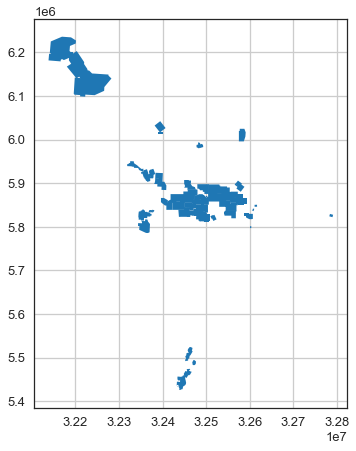

In [19]:
gdf1.plot()
plt.grid()

## Example 2 - 2D Seismic Lines

In [20]:
url = "https://nibis.lbeg.de/net3/public/ogc.ashx?NodeId=474&Service=WFS&"
gdf2 = gg.wms.get_feature(url)
gdf2.head()

,gml_id,OBJECTID,ID,ID_SURVEY,SURVEYNAME,S_KURZNAME,LBEG_ARCHI,OPERATOR,OP_LANG,OP_NACHFOL,...,MESSENDE,PROFILNAME,KOORDINATE,ANREGUNG,RECDAUER,SAMPLING,FOLD,EINSICHT,UP_DATE,geometry
0,384444,384444,9,1,"Five Countries Central Graben Survey, 1992",5CCG-92,"0116422,X00219",HALI,Halliburton Geophysical Services,,...,1992-04-30T00:00:00+01:00,5CCG-92-03E,Untergrundkoordinaten,Airgun,7,2,60,Keine Einsicht ohne Erlaubnis des Eigentümers,2020-01-20T11:35:59+01:00,"LINESTRING (32222068.113 6179202.812, 32223143..."
1,384445,384445,14,1,"Five Countries Central Graben Survey, 1992",5CCG-92,"0116422,X00219",HALI,Halliburton Geophysical Services,,...,1992-04-30T00:00:00+01:00,5CCG-92-05A,Untergrundkoordinaten,Airgun,7,2,60,Keine Einsicht ohne Erlaubnis des Eigentümers,2020-01-20T11:35:59+01:00,"LINESTRING (32198079.231 6186171.041, 32197619..."
2,384446,384446,15,1,"Five Countries Central Graben Survey, 1992",5CCG-92,"0116422,X00219",HALI,Halliburton Geophysical Services,,...,1992-04-30T00:00:00+01:00,5CCG-92-05B,Untergrundkoordinaten,Airgun,7,2,60,Keine Einsicht ohne Erlaubnis des Eigentümers,2020-01-20T11:35:59+01:00,"LINESTRING (32242576.019 6095874.414, 32242352..."
3,384447,384447,16,1,"Five Countries Central Graben Survey, 1992",5CCG-92,"0116422,X00219",HALI,Halliburton Geophysical Services,,...,1992-04-30T00:00:00+01:00,5CCG-92-05C,Untergrundkoordinaten,Airgun,7,2,60,Keine Einsicht ohne Erlaubnis des Eigentümers,2020-01-20T11:35:59+01:00,"LINESTRING (32231416.851 6121140.637, 32231099..."
4,384448,384448,18,1,"Five Countries Central Graben Survey, 1992",5CCG-92,"0116422,X00219",HALI,Halliburton Geophysical Services,,...,1992-04-30T00:00:00+01:00,5CCG-92-05E,Untergrundkoordinaten,Airgun,7,2,60,Keine Einsicht ohne Erlaubnis des Eigentümers,2020-01-20T11:35:59+01:00,"LINESTRING (32185176.376 6205388.696, 32185331..."


## Plotting Data

The plot shows the distribution of 2D seismic surveys in Lower Saxony, Germany.

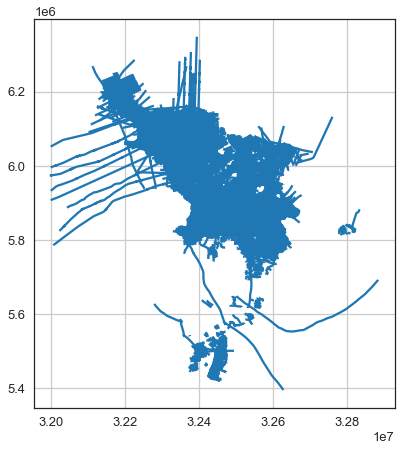

In [21]:
gdf2.plot()
plt.grid()

## Example 3 - Boreholes

In [22]:
url = "https://nibis.lbeg.de/net3/public/ogc.ashx?NodeId=470&Service=WFS&"
gdf3 = gg.wms.get_feature(url)
gdf3.head()

,gml_id,objectid,OST,NORD,IDENTIFIER,LOCHNAME,KURZNAME,ZUGANG,OPERATOR,FIRMA,...,G_ERGEBNIS,T_ERGEBNIS,L_STATUS,ATS_E_HORI,ATS_E_HO_L,GVM_NR,DDR_NAME,E_HORIZONT,E_HORIZO_L,geometry
0,55,55,32368633.30,5920775.01,10747600191,Krummhörn K1,KHRN K1,Gesperrt,"Ruhrgas AG, Essen",Uniper Energy Storage GmbH,...,None,None,None,None,None,None,None,None,None,POINT (32368633.300 5920775.010)
1,56,56,32368633.30,5920775.01,10747600192,Krummhörn K1a,KHRN K1,Gesperrt,"Ruhrgas AG, Essen",Uniper Energy Storage GmbH,...,None,None,None,None,None,None,None,None,None,POINT (32368633.300 5920775.010)
2,57,57,32368572.34,5920800.59,10747600291,Krummhörn K2,KHRN K2,Gesperrt,Kavernen Bau- und Betriebs-GmbH,DEEP.KBB GmbH,...,None,None,None,None,None,None,None,None,None,POINT (32368572.340 5920800.590)
3,58,58,32368830.25,5920580.60,10747600491,Krummhörn K4,KHRN K4,Gesperrt,Kavernen Bau- und Betriebs-GmbH,DEEP.KBB GmbH,...,None,None,None,None,None,None,None,None,None,POINT (32368830.250 5920580.600)
4,59,59,32368891.41,5920916.25,10747600591,Krummhörn K5,KHRN K5,Gesperrt,Kavernen Bau- und Betriebs-GmbH,DEEP.KBB GmbH,...,None,None,None,None,None,None,None,None,None,POINT (32368891.410 5920916.250)


## Plotting Data

The plot shows the distribution of boreholes in Lower Saxony, Germany.

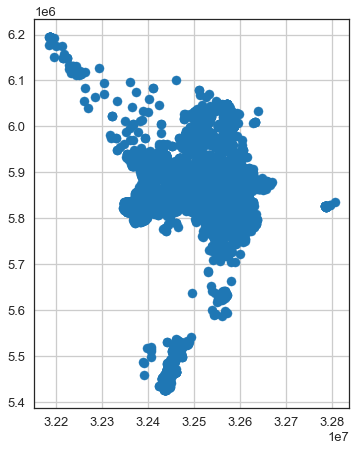

In [23]:
gdf3.plot()
plt.grid()

## Example 4 - Different Geometry Types

In [24]:
url = "https://nibis.lbeg.de/net3/public/ogc.ashx?NodeId=476&Service=WFS&"
gdf4 = gg.wms.get_feature(url)
gdf4.head()

,gml_id,OBJECTID,ID,SURVEYNAME,ARCHIV,MESSJAHR,OPERATOR,OP_NACHFOL,MESSFIRMA,MESSPUNKTE,UP_DATE,geometry
0,1541,1541,112,Jemgum 2007,0127494,2007,GdF Produktion Exploration Deutschland GmbH,Neptune Energy Deutschland GmbH,Geophysik und Geotechnik Leipzig GmbH,1340,2020-01-20T00:00:00+01:00,"MULTIPOLYGON (((32395246.839 5907777.660, 3239..."
1,1542,1542,111,Sagermeer 2005,0125831,2005,ExxonMobil Production Deutschland GmbH,ExxonMobil Production Deutschland GmbH,Comp. Generale Geophysique,2803,2020-01-20T00:00:00+01:00,"MULTIPOLYGON (((32446717.522 5856710.088, 3244..."
2,1543,1543,120,Hümmling 2013,0131520,2013,GDF SUEZ E&P DEUTSCHLAND GMBH,Neptune Energy Deutschland GmbH,Deutsche Montan Technologie GmbH,342,2020-01-20T00:00:00+01:00,"MULTIPOLYGON (((32416592.825 5852885.544, 3241..."
3,1544,1544,49,Rotenburg/Wümme (1984),0112162,1984,Deutsche Texaco AG Aufschluss und Gew.,Wintershall Dea Deutschland AG,Prakla Seismos,2184,2020-01-20T00:00:00+01:00,"POLYGON ((32545955.921 5896473.525, 32544536.2..."
4,1545,1545,102,Odisheim 1989/90,0112092,1989,BEB Erdgas und Erdöl GmbH,BEB Erdgas und Erdöl GmbH & Co. KG,Prakla Seismos,2824,2020-01-20T00:00:00+01:00,"POLYGON ((32504255.640 5967591.298, 32503387.8..."


## Plotting Data

The plot shows the distribution of a gdf containing multiple geometry types.

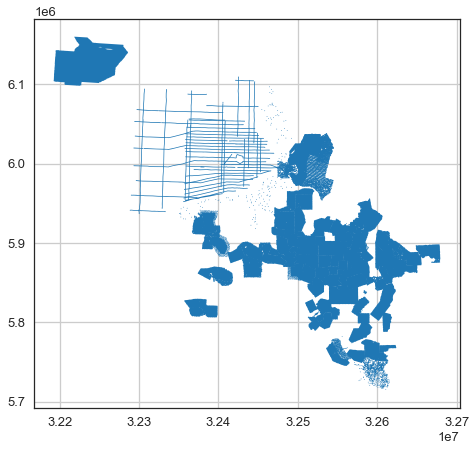

In [25]:
gdf4.plot()
plt.grid()